## 조건부독립

확률변수 A, B가 독립이면 A, B의 결합확률은 주변확률의 곱과 같다.

$$P(A, B) = P(A)P(B)$$

조건부독립(conditional independence)은 일반적인 독립과 달리 조건이 되는 별개의 확률변수 C가 존재해야 한다. 조건이 되는 확률변수 C에 대한 A, B의 결합조건부확률이 C에 대한 A, B의 조건부확률의 곱과 같으면 A와 B가 C에 대해 조건부독립이라고 한다.

$$P(A, B|C) = P(A|C) P(B|C)$$


기호로는 다음과 같이 표기한다.

$$A \text{⫫} B \;\vert\; C$$

조건부독립과 비교하여 일반적인 독립은 무조건부독립이라고 한다. 무조건부독립은 다음과 같이 표기하도 한다.

$$A \text{⫫} B \;\vert\; \emptyset$$

A, B가 C에 대해 조건부독립이면 다음도 만족한다.

$$P(A|B,C) = P(A|C)$$

$$P(B|A,C) = P(B|C)$$

주의할 점은 조건부독립과 무조건부독립은 관계가 없다는 점이다. 즉, 두 확률변수가 독립이라고 항상 조건부독립이 되는 것도 아니고 조건부독립이라고 꼭 독립이 되는 것도 아니다.

$$P(A,B) = P(A)P(B) \;\; \bcancel{\implies} \;\; P(A,B|C) = P(A|C)P(B|C)$$

$$P(A,B|C) = P(A|C)P(B|C) \;\; \bcancel{\implies} \;\; P(A,B) = P(A)P(B)$$

예를 들어 어떤 동물의 어미의 몸무게가  𝑥 kg일 때 새끼의 몸무게는  𝑥 를 기댓값으로 하고 5kg 표준편차를 가지는 정규분포라고 가정하자. 

이 동물의 새끼 중 2마리의 몸무게를 각각 A, B라고 하고 어미의 몸무게를 C라고 한다. 시물레이션을 통해 어미 표본과 각각의 어미에 대해 2마리의 새끼 표본을 만들자.

In [1]:
import numpy as np

np.random.seed(0)
C = np.random.normal(100, 15, 2000)  # loc(기대값), scale(표준편차), size(크기)
A = C + np.random.normal(0, 5, 2000)  # C에 5kg 표준편차 추가
B = C + np.random.normal(0, 5, 2000)

In [2]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

스캐터플롯을 보면 B와 C 자체는 상관관계가 있음을 알 수 있다. 하지만 어미의 몸무게가 고정되어 있으면 두 새끼의 몸무게는 서로 독립인 것을 알 수 있다.

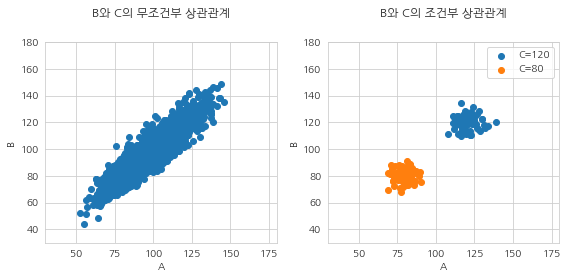

In [3]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B와 C의 무조건부 상관관계", y=1.1)

plt.subplot(122)
idx1 = (118 < C) & (C < 122)  # C 값이 118 ~ 122 인 인덱스
idx2 = (78 < C) & (C < 82)  # C 값 78 ~ 82인 인덱스
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계", y=1.1)

plt.tight_layout()
plt.show()

## 나이브 가정

독립변수  𝑥 가  𝐷 차원이라고 가정하자.

$$x = (x_1, \ldots, x_D)$$

가능도함수는  𝑥1,…,𝑥𝐷 의 결합확률이 된다.

$$P(x \mid y = k) = P(x_1, \ldots, x_D \mid y = k)$$

원리상으로는  𝑦=𝑘 인 데이터만 모아서 이 가능도 함수의 모양을 추정할 수 있다. 하지만 차원  𝐷 가 커지면 가능도함수의 추정이 현실적으로 어려워진다.

따라서 나이즈베이즈 분류모형(Naive Bayes classification model)에서는 모든 차원의 개별 독립변수가 서로 조건부독립(conditional independent)이라는 가정을 사용한다. 이러한 가정을 나이브 가정(naive assumption)이라고 한다.

나이브 가정으로 사용하면 벡터  𝑥 의 결합확률분포함수는 개별 스칼라 원소  𝑥𝑑 의 확률분포함수의 곱이 된다.

$$P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k)$$

스칼라 원소  𝑥𝑑 의 확률분포함수는 결합확률분포함수보다 추정하기 훨씬 쉽다.

가능도함수를 추정한 후에는 베이즈정리를 사용하여 조건부확률을 계산할 수 있다.

$$\begin{align}
P(y = k \mid x) 
&= \dfrac{ P(x_1, \ldots, x_D \mid y = k) P(y = k) }{P(x)} \\
&= \dfrac{ \left( \prod_{d=1}^D P(x_{d} \mid y = k) \right) P(y = k) }{P(x)}
\end{align}$$

## 정규분포 가능도 모형

#### 𝑥  벡터의 원소가 모두 실수이고 클래스마다 특정한 값 주변에서 발생한다고 하면 가능도 분포로 정규분포를 사용한다. 

각 독립변수  𝑥𝑑 마다, 그리고 클래스  𝑘 마다 정규 분포의 기댓값  𝜇𝑑,𝑘 , 표준 편차  𝜎2𝑑,𝑘 가 달라진다. QDA 모형과는 달리 모든 독립변수들이 서로 조건부독립이라고 가정한다.

$$P(x_d \mid y = k) = \dfrac{1}{\sqrt{2\pi\sigma_{d,k}^2}} \exp \left(-\dfrac{(x_d-\mu_{d,k})^2}{2\sigma_{d,k}^2}\right)$$

## 베르누이분포 가능도 모형

#### 베르누이분포 가능도 모형에서는 각각의  𝑥=(𝑥1,…,𝑥𝐷) 의 각 원소  𝑥𝑑 가 0 또는 1이라는 값만을 가질 수 있다. 

즉 독립변수는  𝐷 개의 독립적인 베르누이 확률변수, 즉 동전으로 구성된 동전 세트로 표현할 수 있다. 이 동전들의 모수  𝜇𝑑 는 동전  𝑑 마다 다르다.

그런데 클래스  𝑦=𝑘   (𝑘=1,…,𝐾) 마다도  𝑥𝑑 가 1이 될 확률이 다르다. 즉, 동전의 모수  𝜇𝑑,𝑘 는 동전  𝑑 마다 다르고 클래스  𝑘 마다도 다르다. 즉, 전체  𝐷×𝐾 의 동전이 존재하며 같은 클래스에 속하는  𝐷 개의 동전이 하나의 동전 세트를 구성하고 이러한 동전 세트가  𝐾 개 있다고 생각할 수 있다.

$$P(x_d \mid y = k) = \mu_{d,k}^{x_d} (1-\mu_{d,k})^{(1-x_d)}$$

$$P(x_1, \ldots, x_D \mid y = k) 
= \prod_{d=1}^D \mu_{d,k}^{x_d} (1-\mu_{d,k})^{(1-x_d)}$$

이러한 동전 세트마다 확률 특성이 다르므로 
#### 베르누이분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 동전 세트를  𝑁 번 던진 결과로부터  1,…,𝐾  중 어느 동전 세트를 던졌는지를 찾아내는 모형이라고 할 수 있다.

## 다항분포 가능도 모형

다항분포 모형에서는  𝑥  벡터가 다항분포의 표본이라고 가정한다. 즉,  𝐷 개의 면을 가지는 주사위를  ∑𝐷𝑑=1𝑥𝑑 번 던져서 나온 결과로 본다. 예를 들어  𝑥 가 다음과 같다면,

$$x = (1, 4, 0, 5)$$

4면체 주사위를 10번 던져서 1인 면이 1번, 2인 면이 4번, 4인 면이 5번 나온 결과로 해석한다.

각 클래스마다 주사위가 다르다고 가정하므로  𝐾 개의 클래스를 구분하는 문제에서는  𝐷 개의 면을 가진 주사위가  𝐾 개 있다고 본다.

$$P(x_1, \ldots, x_D \mid y = k) 
\;\; \propto \;\; \prod_{d=1}^D \mu_{d,k}^{x_{d,k}}$$

$$\sum_{d=1}^{D} \mu_{d,k} = 1$$

#### 따라서 다항분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 주사위를 던진 결과로부터  1,…,𝐾  중 어느 주사위를 던졌는지를 찾아내는 모형이라고 할 수 있다.

## 사이킷런에서 제공하는 나이브베이즈 모형

사이킷런의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브베이즈 모형 클래스를 제공한다.

+ GaussianNB: 정규분포 나이브베이즈
+ BernoulliNB: 베르누이분포 나이브베이즈
+ MultinomialNB: 다항분포 나이브베이즈

이 클래스들은 다양한 속성값 및 메서드를 가진다. 우선 사전 확률과 관련된 속성은 다음과 같다.

+ classes_
    + 종속변수 Y의 클래스(라벨)
+ class_count_
    + 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
+ class_prior_
    + 종속변수 Y의 무조건부 확률분포  𝑃(𝑌)  (정규분포의 경우에만)
+ class_log_prior_
    + 종속변수 Y의 무조건부 확률분포의 로그  log𝑃(𝑌)  (베르누이분포나 다항분포의 경우에만)

### 1. 정규분포 나이브베이즈 모형

가우시안 나이브베이즈 모형 GaussianNB은 가능도 추정과 관련하여 다음과 같은 속성을 가진다.

+ theta_: 정규분포의 기댓값  𝜇 
+ sigma_: 정규분포의 분산  𝜎2

#### 예제1.

실수인 두 개의 독립변수  𝑥1,𝑥2 와 두 종류의 클래스  𝑦=0,1 을 가지는 분류문제가 있다.

두 독립변수의 분포는 정규분포이고  𝑦 의 클래스에 따라 다음과 같이 모수가 달라진다.

$$\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix}$$

$$\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix}$$

데이터는  𝑦=0 인 데이터가 40개,  𝑦=1 인 데이터가 60개 주어졌다. 이 데이터를 시각화하면 다음과 같다.

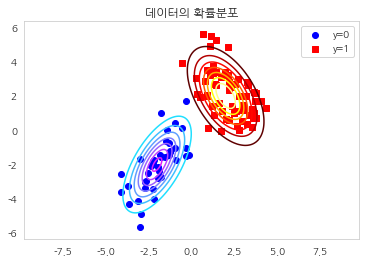

In [11]:
import scipy as sp
import scipy.stats

np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)  # y=0일때 확률밀도함수
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot) # y=1일때 확률밀도함수
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker='s', c='r', label="y=1")
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.legend()
plt.show()

이 데이터를 가우시안 나이브베이즈 모형으로 다음과 같이 풀 수 있다.

In [12]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률

$$p(y=0), p(y=1)$$

의 값은 다음과 같다.

In [13]:
model_norm.classes_

array([0., 1.])

In [15]:
model_norm.class_prior_

array([0.4, 0.6])

In [16]:
model_norm.class_count_

array([40., 60.])

각 클래스에 따라  𝑥 가 이루는 확률분포의 모수를 계산하면 다음과 같다. 나이브 가정에 따라  𝑥1,𝑥2 는 독립이므로 상관관계를 구하지 않았다.

In [20]:
model_norm.theta_[0], model_norm.theta_[1]  # [-2, -2], [2, 2]

(array([-1.96197643, -2.00597903]), array([2.19130701, 2.12626716]))

In [21]:
model_norm.sigma_[0]

array([1.02398854, 2.31390497])

In [22]:
model_norm.sigma_[1]

array([1.25429371, 1.93742544])

이렇게 구한 데이터의 확률분포를 시각화하면 다음과 같다.

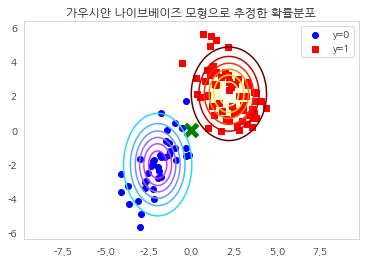

In [26]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c='g', marker='x', s=150, linewidth=5)  # 중간에 위치. 어느 클래스에 속하는지 파악 어려움
plt.legend()
plt.axis("equal")
plt.title("가우시안 나이브베이즈 모형으로 추정한 확률분포")
plt.show()

이 모형을 사용하여  𝑥new=(0,0) 인 데이터의  𝑦 값을 예측하자. 각 클래스값이 나올 확률은 predict_proba 메서드로 구할 수 있다. 결과는 y=0일 확률이 0.48, y=1일 확률이 0.52이다.

In [28]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

그림에서는 y=0의 확률분포에 가까워 보이지만 수치상으로는 y=1일 확률이 더 높게 나온다.

이 값이 나오게 된 중간과정을 살펴보자. 

#### (1) 우선 추정된 독립변수의 모수와 정규 분포의 확률밀도함수를 사용하여 가능도를 구할 수 있다. 
+ 나이브베이즈 가정에 따라 두 입력 변수의 곱을 결합 확률로 계산한다.

$$p(x_1, x_2 | y) \propto p(x_1) p(x_2)$$

In [32]:
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1])),
]

In [33]:
likelihood

[0.006615760017637298, 0.00468796559514829]

In [36]:
[rv0.pdf([x_new]), rv1.pdf(x_new)]

[0.006615760017637305, 0.004687965595148291]

여기에 사전 확률을 곱하면 사후 확률에 비례하는 값이 나온다.

$$p(y|x_1, x_2) \propto p(x_1, x_2|y) p(y)$$

아직 정규화 상수  𝑝(𝑥) 로 나누어주지 않았으므로 두 값의 합이 1이 아니다. 즉, 확률이라고 부를 수는 없다. 하지만 크기를 비교하면 y=0일 확률이 y=1일 확률보다 훨씬 크다는 것을 알 수 있다.

In [37]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

이 값을 정규화하면 predict_proba 메서드로 구한 것과 같은 값이 나온다.

In [38]:
posterior / posterior.sum()

array([0.48475244, 0.51524756])

### 연습 문제 1

붓꽃 분류문제를 가우시안 나이브베이즈 모형을 사용하여 풀어보자.

(1) 각각의 종이 선택될 사전확률을 구하라.

(2) 각각의 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산을 구하라.

(3) 학습용 데이터를 사용하여 분류문제를 풀고 다음을 계산하라.

+ 분류결과표
+ 분류보고서
+ ROC커브
+ AUC

In [39]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model_iris = GaussianNB().fit(X, y)

In [40]:
model_iris.classes_

array([0, 1, 2])

In [41]:
model_iris.class_count_

array([50., 50., 50.])

In [42]:
# 각각의 종이 선택될 사전 확률 : 모두 동일하다
model_iris.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [43]:
# 각 종에 대한 꽃받침 길이/폭, 꽃잎 길이 및 폭의 평균과 분산
model_iris.theta_[0], model_iris.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [44]:
model_iris.theta_[1], model_iris.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [45]:
model_iris.theta_[2], model_iris.sigma_[2]  # 클래스 3번째 종의 꽃받침 길이의 분산이 가장 큼

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [46]:
# 분류결과표/보고서, ROC/AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [91]:
y_hat = [None] * X.shape[0]

for i in range(X.shape[0]):
    y_hat[i] = model_iris.predict_proba([X[i]]).argmax()

confusion_matrix(y, y_hat)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [92]:
print(classification_report(y, y_hat, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



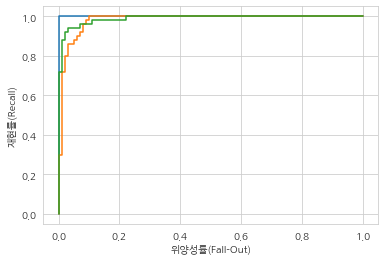

In [94]:
# multi-class ROC curve
from sklearn.preprocessing import label_binarize
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel("위양성률(Fall-Out)")
plt.ylabel("재현률(Recall)")
plt.show()

In [100]:
# AUC
for i in range(3):
    print("class {}:".format(i+1), auc(fpr[i], tpr[i]))

class 1: 1.0
class 2: 0.9818
class 3: 0.989


### 2. 베르누이분포 나이브베이즈 모형

전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지 여부는 베르누이 확률변수로 모형화할 수 있다. 이렇게 독립변수가 0 또는 1의 값을 가지면 베르누이 나이브베이즈 모형을 사용한다.

베르누이분포 나이브베이즈 모형 클래스 BernoulliNB는 가능도 추정과 관련하여 다음 속성을 가진다.

+ feature_count_: 각 클래스  𝑘 에 대해  𝑑 번째 동전이 앞면이 나온 횟수  𝑁𝑑,𝑘 
+ feature_log_prob_: 베르누이분포 모수의 로그

$$\log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$

여기에서  𝑁𝑘 은 클래스  𝑘 에 대해 동전을 던진 총 횟수이다. 표본 데이터의 수가 적은 경우에는 모수에 대해 다음처럼 스무딩(smoothing)을 할 수도 있다.

#### 스무딩

표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수도 있다. 하지만 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 따라서 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다. 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 가까운 다음과 값으로 변한다. 이를 라플라스 스무딩(Laplace smoothing) 또는 애드원(Add-One) 스무딩이라고 한다.

$$\hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + 2 \alpha}$$

가중치  𝛼 를 사용하여 스무딩의 정도를 조절할 수도 있다. 가중치  𝛼 는 정수가 아니라도 괜찮다. 가중치가 1인 경우는 무정보 사전확률을 사용한 베이즈 모수추정의 결과와 같다.

In [111]:
X = np.array([
    [0, 1, 1, 0],  # 정상  키워드 2번, 3번 포함
    [1, 1, 1, 1],  # 정상  키워드 다 포함
    [1, 1, 1, 0],  # 정상  키워드 1, 2, 3번 포함
    [0, 1, 0, 0],  # 정상  키워드 2번 포함
    [0, 0, 0, 1],  # 스팸  키워드 4번 포함
    [0, 1, 1, 0],  # 스팸  키워드 2번 3번 포함
    [0, 1, 1, 1],  # 스팸
    [1, 0, 1, 0],  # 스팸
    [1, 0, 1, 1],  # 스팸
    [0, 1, 1, 0]]) # 스팸
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 정상메일 0, 스팸 1

이 데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 예를 들어 첫번째 메일은 정상 메일이고 1번, 4번 키워드는 포함하지 않지만 2번, 3번 키워드를 포함한다고 볼 수 있다.

이 데이터를 베르누이 나이브베이즈 모형으로 예측해 보자.

In [112]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률의 값은 다음과 같다.

In [113]:
model_bern.classes_

array([0, 1])

In [114]:
model_bern.class_count_

array([4., 6.])

In [117]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

각 클래스  𝑘  별로, 그리고 각 독립변수  𝑑  별로, 각각 다른 베르누이 확률변수라고 가정하여 모두 8개의 베르누이 확률변수의 모수를 구하면 다음과 같다.

In [122]:
fc = model_bern.feature_count_  #(클래스: 정상/스팸), (독립변수 4개 키워드)
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [123]:
fc = fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)
fc

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

그런데 이 값은 모형 내에서 구한 값과 다르다. 모형 내에서 스무딩(smoothing)이 이루어지기 때문이다. 스무딩은 동전의 각 면 즉, 0과 1이 나오는 가상의 데이터를 추가함으로서 추정한 모수의 값이 좀 더 0.5에 가까워지도록 하는 방법이다. 이 때 사용한 스무딩 가중치 값은 다음과 같이 확인할 수 있다.

In [124]:
model_bern.alpha

1.0

스무딩이 적용된 베르누이 모수값은 다음과 같다.

In [125]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

모형이 완성되었으니 테스트 데이터를 사용하여 예측을 해 본다. 예를 들어 1번, 2번 키워드를 포함한 메일이 정상 메일인지 스팸 메일인지 알아보자.

In [126]:
x_new = np.array([1, 1, 0, 0])

model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

정상 메일일 확률 0.72, 스팸메일일 확률 0.28이므로 정상 메일일 가능성이 약 3배임을 알 수 있다. 이 값은 다음과 같이 구할 수도 있다.

In [127]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1) * np.exp(model_bern.class_log_prior_)
p

array([0.03703704, 0.0140625 ])

In [128]:
p / p.sum()

array([0.72480181, 0.27519819])

반대로 3번, 4번 키워드가 포함된 메일은 스팸일 가능성이 약 90%이다.

In [129]:
x_new = np.array([0, 0, 1, 1])

model_bern.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

In [130]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1) * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.09530901, 0.90469099])

### 연습 문제 2

(1) MNIST 숫자 분류문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브베이즈 모형을 적용하자. 분류 결과를 분류보고서 형식으로 나타내라.

(2) BernoulliNB 클래스의 binarize 인수를 사용하여 같은 문제를 풀어본다.

(3) 계산된 모형의 모수 벡터 값을 각 클래스별로 8x8 이미지의 형태로 나타내라. 이 이미지는 무엇을 뜻하는가?

In [143]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import Binarizer

digits = load_digits()
X = digits.data
y = digits.target
binary = Binarizer(threshold=8).fit(X)
X = binary.transform(X)
model = BernoulliNB().fit(X, y)

In [144]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [145]:
model.class_count_

array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.])

In [147]:
np.exp(model.class_log_prior_)  # 각 클래스의 사전확률

array([0.09905398, 0.10127991, 0.0984975 , 0.10183639, 0.10072343,
       0.10127991, 0.10072343, 0.09961046, 0.09682805, 0.10016694])

In [151]:
model.feature_count_.shape  #10개 클래스에 대한 64 변수들의 모수

(10, 64)

In [158]:
model.predict_proba(X)[0]

array([9.99998147e-01, 1.73558644e-11, 1.79128731e-10, 1.13919549e-07,
       9.28945133e-11, 3.00912276e-08, 3.10468848e-11, 2.22525657e-13,
       9.09520452e-07, 7.99320086e-07])

In [161]:
y_hat = [None] * X.shape[0]

for i in range(X.shape[0]):
    y_hat[i] = model.predict_proba(X)[i].argmax()
    
confusion_matrix(y, y_hat)

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]])

In [162]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.82      0.80      0.81       182
           2       0.89      0.88      0.88       177
           3       0.95      0.85      0.89       183
           4       0.97      0.93      0.95       181
           5       0.92      0.91      0.91       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.81      0.80      0.81       174
           9       0.79      0.90      0.84       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [163]:
# BernoulliNB 클래스의 binarize 인수를 사용
X = digits.data
y = digits.target
model = BernoulliNB(binarize=8).fit(X, y)

In [164]:
y_hat = [None] * X.shape[0]

for i in range(X.shape[0]):
    y_hat[i] = model.predict_proba(X)[i].argmax()

In [165]:
confusion_matrix(y, y_hat)

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]])

In [166]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.82      0.80      0.81       182
           2       0.89      0.88      0.88       177
           3       0.95      0.85      0.89       183
           4       0.97      0.93      0.95       181
           5       0.92      0.91      0.91       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.81      0.80      0.81       174
           9       0.79      0.90      0.84       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [168]:
# 계산된 모형의 모수 벡터 값을 각 클래스별로 8x8 이미지의 형태로 나타내라

model.feature_count_.shape

(10, 64)

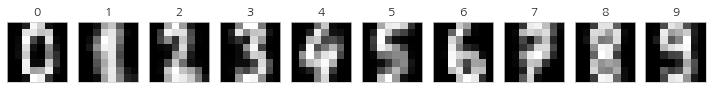

In [174]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(model.feature_count_[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### 3. 다항분포 나이브베이즈 모형

다항분포 나이브베이즈 모형 클래스 MultinomialNB는 가능도 추정과 관련하여 다음의 속성들을 가진다.

+ feature_count_: 각 클래스  𝑘 에서  𝑑 번째 면이 나온 횟수  𝑁𝑑,𝑘 
+ feature_log_prob_: 다항분포의 모수의 로그


$$\log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$

여기에서  𝑁𝑘 은 클래스  𝑘 에 대해 주사위를 던진 총 횟수를 뜻한다.

스무딩 공식은

$$\hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + D \alpha}$$

이다.

이번에도 스팸메일 필터링을 예로 들어보다. 다만 BOW 인코딩을 할 때, 각 키워드가 출현한 빈도를 직접 입력 변수로 사용한다.

In [175]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [176]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

사전 확률은 다음과 같이 구한다.

In [177]:
model_mult.classes_

array([0, 1])

In [178]:
model_mult.class_count_

array([4., 6.])

In [179]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

다음으로 각 클래스에 대한 가능도 확률분포를 구한다. 다항분포 모형을 사용하므로 각 클래스틑 4개의 면을 가진 주사위로 생각할 수 있다. 그리고 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나누면 된다. 우선 각 클래스 별로 각각의 면이 나온 횟수는 다음과 같다.

In [180]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [183]:
fc[0].sum(), fc[1].sum(), fc.sum()

(40.0, 48.0, 88.0)

이 데이터에서 클래스 Y=0인 주사위를 던진 횟수는 첫번째 행의 값의 합인 40이므로 클래스 Y=0인 주사위를 던져 1이라는 면이 나올 확률은 다음과 같이 계산할 수 있다.

$$\mu_{1,Y=0} = \dfrac{12}{40} = 0.3$$

In [185]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

실제로는 극단적인 추정을 피하기 위해 이 값을 가중치 1인 스무딩을 한 추정값을 사용한다.

In [186]:
model_mult.alpha

1.0

In [187]:
(fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

이렇게 구한 모수 추정치는 다음과 같다.

In [188]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

이제 이 값을 사용하여 예측을 해 보자. 만약 어떤 메일에 1번부터 4번까지의 키워드가 각각 10번씩 나왔다면 다음과 같이 확률을 구할 수 있다. 구해진 확률로부터 이 메일이 스팸임을 알 수 있다.

In [189]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

다항분포의 확률질량함수을 사용하면 다음과 같이 직접 확률을 구할 수도 있다.

In [191]:
p = (theta ** x_new).prod(axis=1) * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

### 연습 문제 3
MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.

In [192]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

model_digits = MultinomialNB().fit(X, y)

In [194]:
y_hat = [None] * X.shape[0]

for i in range(X.shape[0]):
    y_hat[i] = model_digits.predict_proba(X)[i].argmax()

In [195]:
confusion_matrix(y, y_hat)

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]])

In [196]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



이진화하여 베르누이 나이브베이즈 모형을 적용한 결과보다 정확도, 재현율, f1-score가 다소 높음

### 연습 문제 4
텍스트 분석에서 TF-IDF 인코딩을 하면 단어의 빈도수가 정수가 아닌 실수값이 된다. 이런 경우에도 다항분포 모형을 적용할 수 있는가?

## 뉴스그룹 분류

다음은 뉴스그룹 데이터에 대해 나이브베이즈 분류모형을 적용한 결과이다.

In [198]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])

model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('model', MultinomialNB()),
])

model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english", token_pattern=r"\b[a-z0-9_\-\.]+[a-z0-9_\-\.]+\b")),
    ('model', MultinomialNB()),
])

In [201]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)  # cv=5 5개로 분리하여 교차 검증
    print("Model{0:d}: Mean score: {1:.3f}".format(i + 1, np.mean(scores)))

Model1: Mean score: 0.855
Model2: Mean score: 0.856
Model3: Mean score: 0.883
Model4: Mean score: 0.892
CPU times: user 2min, sys: 4.01 s, total: 2min 4s
Wall time: 2min 2s


### 연습 문제 5

(1) 만약 독립변수로 실수 변수, 0 또는 1 값을 가지는 변수, 자연수 값을 가지는 변수가 섞여 있다면 사이킷런에서 제공하는 나이브베이즈 클래스를 사용하여 풀 수 있는가?

(2) 사이킷런에서 제공하는 분류문제 예제 중 숲의 수종을 예측하는 covtype 분류문제는 연속확률분포 특징과 베르누이확률분포 특징이 섞여있다. 이 문제를 사이킷런에서 제공하는 나이브베이즈 클래스를 사용하여 풀어라.

In [203]:
from sklearn.datasets import fetch_covtype

In [204]:
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [205]:
import pandas as pd

df = pd.DataFrame(covtype.data, columns=["x{:02d}".format(i+1) for i in range(covtype.data.shape[1])], dtype=int)
sy = pd.Series(covtype.target, dtype='category')
df["covtype"] = sy
df.tail()

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,covtype
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [206]:
# 1~10번까지는 실수값, 11~54번까지는 이진 카테고리값으로 구성
# 11~54번까지의 값을 카테고리 형태로 바꿈
df.iloc[:, 11:54] = df.iloc[:, 11:54].astype('category')

In [207]:
from sklearn.naive_bayes import MultinomialNB
X = df.iloc[:, :54]
y = df.iloc[:, 54]
X.shape, y.shape

((581012, 54), (581012,))

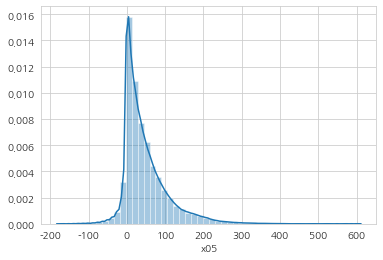

In [216]:
# x05에 마이너스 값이 포함되어 있어 제거해 봄
sns.distplot(df["x05"], kde=True, rug=False)
plt.show()

In [219]:
X_new = pd.concat([df.iloc[:, :4], df.iloc[:, 5:54]], axis=1)
X_new.tail()

,x01,x02,x03,x04,x06,x07,x08,x09,x10,x11,...,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54
581007,2396,153,20,85,108,240,237,118,837,0,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,95,240,237,119,845,0,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,90,236,241,130,854,0,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,90,230,245,143,864,0,...,0,0,0,0,0,0,0,0,0,0
581011,2383,165,13,60,67,231,244,141,875,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
model = MultinomialNB().fit(X_new, y)

In [221]:
model.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [222]:
model.class_count_

array([211840., 283301.,  35754.,   2747.,   9493.,  17367.,  20510.])

In [223]:
np.exp(model.class_log_prior_)  # 사전확률

array([0.36460521, 0.48759922, 0.06153746, 0.00472796, 0.01633873,
       0.02989095, 0.03530048])

In [224]:
score = cross_val_score(model, X_new, y, cv=5)
score.mean()

0.14615362907071724

In [225]:
score

array([0.10638957, 0.20355582, 0.11805305, 0.15923271, 0.14353701])

In [226]:
model_norm = GaussianNB().fit(X, y)

In [227]:
model_norm.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [228]:
model_norm.class_count_

array([211840., 283301.,  35754.,   2747.,   9493.,  17367.,  20510.])

In [229]:
model_norm.class_prior_

array([0.36460521, 0.48759922, 0.06153746, 0.00472796, 0.01633873,
       0.02989095, 0.03530048])

In [230]:
score_norm = cross_val_score(model_norm, X, y, cv=5)

In [231]:
score_norm

array([0.51070092, 0.45649031, 0.35766166, 0.43172606, 0.40624785])

In [232]:
score_norm.mean()

0.4325653588378655